### Air travel demand is always expected to increase during the holiday season as many of them plan for overseas vacations. Usually, there could be many option to fly to a destination. As this is a competitive industry, it is important for any airline to know what are the customer expectations from pre-flight to post-flight. The model which we build can help to predict the significant aspects that lead to customer satisfaction.

In [5]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics
import warnings
warnings.filterwarnings("ignore")

In [6]:
AirlineData = pd.read_csv('airline_passenger_satisfaction.csv')
AirlineData.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


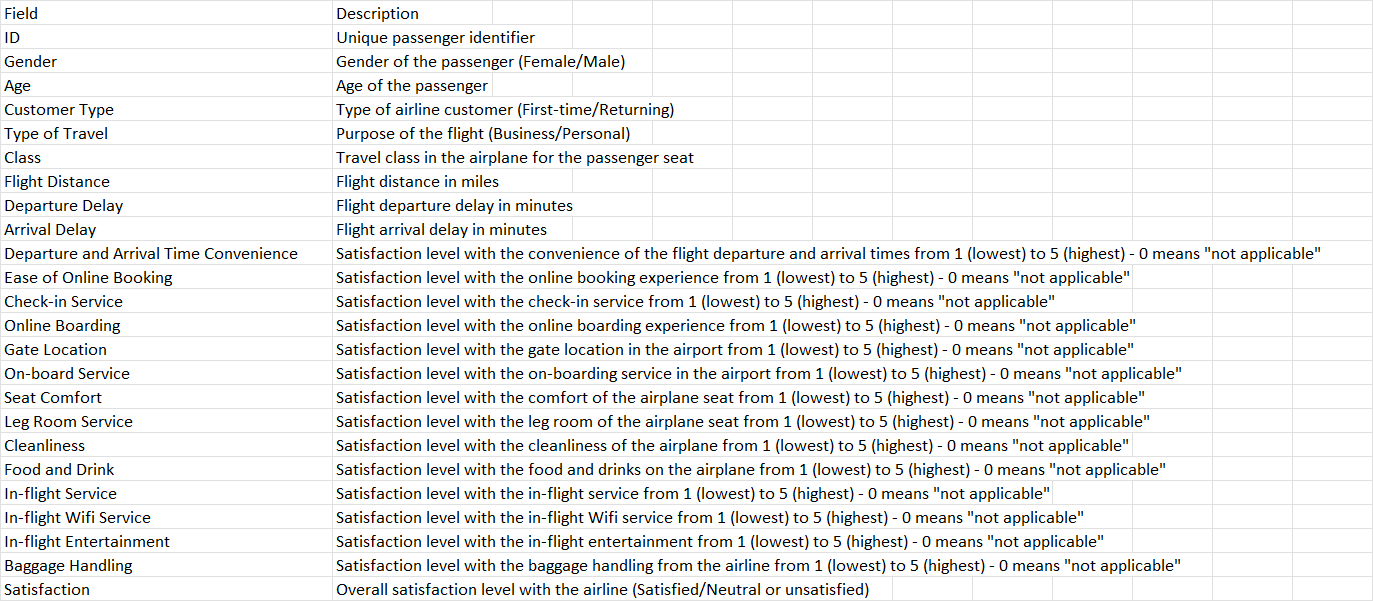![image.png]()

In [7]:
AirlineData.info()
print("Shape of the dataset:" , AirlineData.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [8]:
# Droping ID Column as it is just like serial number (numbers are continous) and this information is not required for EDA or Model.
AirlineData = AirlineData.drop('ID', axis=1)

## Handling Duplication, Missing Values, and Outliers

### Handling Data Duplication

In [9]:
print('The number of duplication is:', AirlineData.duplicated().sum())
# there is no duplication

The number of duplication is: 0


### Handling Missing Values

In [10]:
total = AirlineData.isnull().sum().sort_values(ascending=False)
percent = (AirlineData.isnull().sum()/AirlineData.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival Delay,393,0.003026
Gender,0,0.000000
Gate Location,0,0.000000
Baggage Handling,0,0.000000
In-flight Entertainment,0,0.000000


<AxesSubplot:xlabel='Arrival Delay', ylabel='Density'>

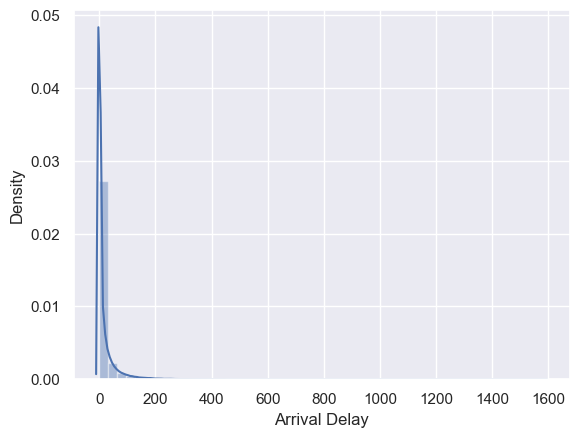

In [11]:
# check the distribution of 'Arrival Delay'
sb.distplot(AirlineData['Arrival Delay'])
# it can be seen that the distribution of 'Arrival Delay' is skewed

In [12]:
# impute missing values with median because the data is skewed
AirlineData['Arrival Delay'] = AirlineData['Arrival Delay'].fillna(AirlineData['Arrival Delay'].median())

### Outlier Detection

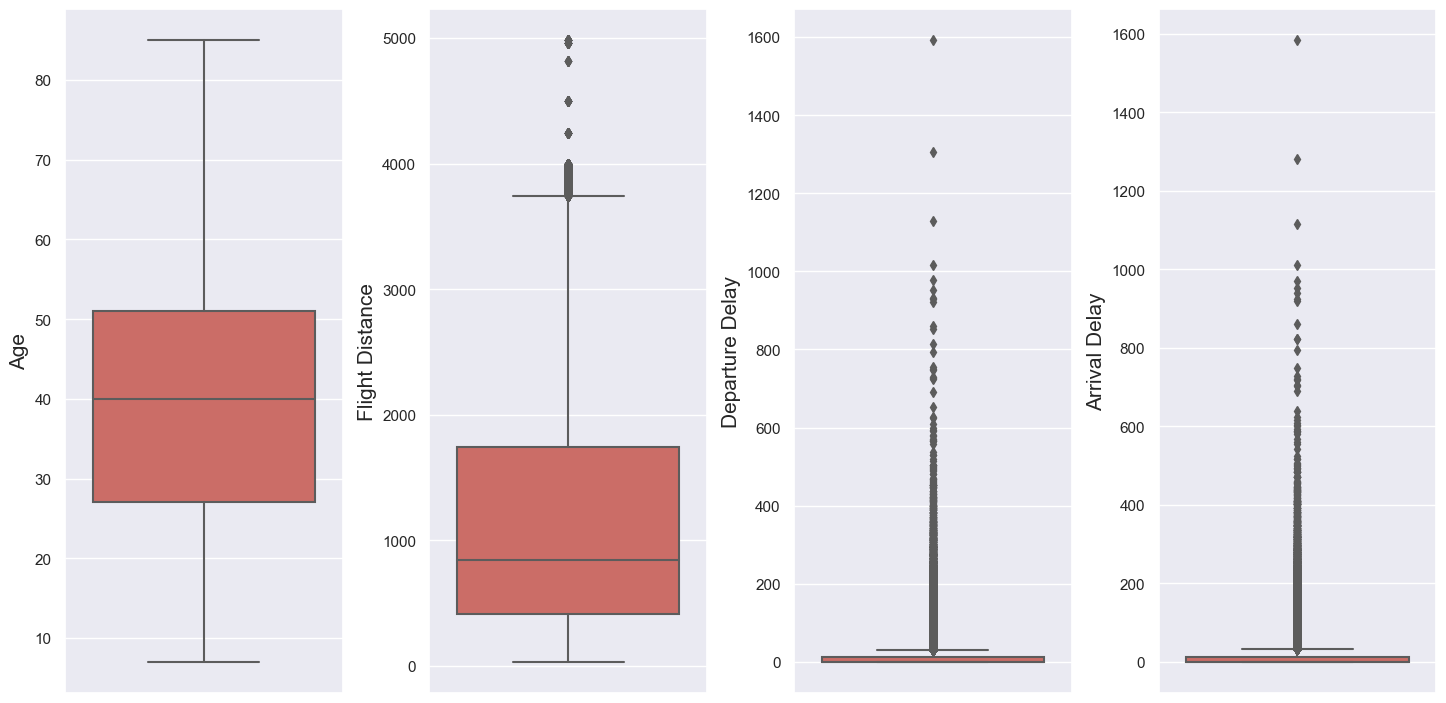

In [13]:
# for numerical columns (we treat those rating columns as categorical data here.)
boxPlot = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', ]
sb.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(1, 4, figsize=(15,8))
fig.tight_layout(pad=3.0)

for f,ax in zip(boxPlot,axs.ravel()):
    sb.set(font_scale = 2)
    ax=sb.boxplot(ax=ax,data=AirlineData,y=AirlineData[f], palette = 'hls')

#### Observations:  
#### As from the boxplot, our majority of customers age is ranging from 30 to 50.
#### It can be seen that outliers were found in the following variables: -Flight Distance -Departure Delay -Arrival Delay





We have observed numerous outliers in the data concerning flight delays during arrival and departure, which has hindered our ability to accurately predict the factors that affect passenger satisfaction levels. However, we suspect that flight delays might have an impact on passenger satisfaction levels. Therefore, we have segmented the delay times into subcategories to determine whether passengers still feel satisfied even after experiencing a delay, or if they are mostly dissatisfied. Additionally, we want to investigate whether passengers still feel dissatisfied even when there is no delay.

### Analysis before handling outliers for flight delay and flight distance

#### Relationship between Departure Delay, Arrival Delay, Flight Distance and Satisfaction

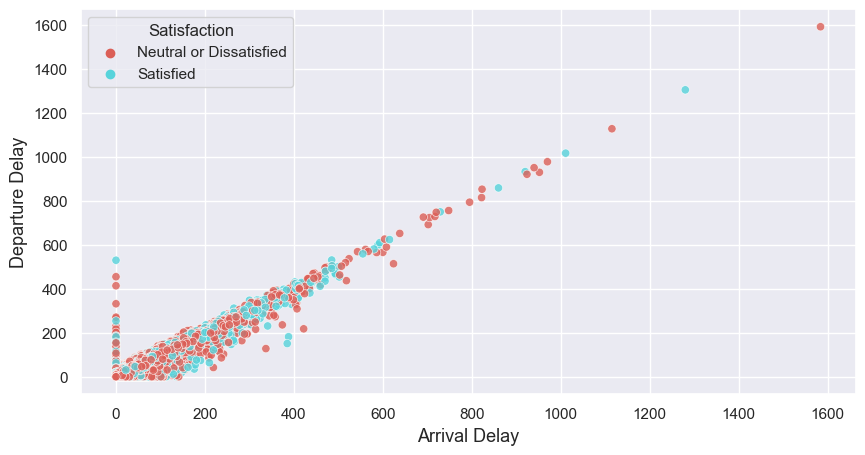

In [14]:
sb.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sb.scatterplot(data=AirlineData, x='Arrival Delay', y='Departure Delay', hue='Satisfaction', palette='hls', alpha=0.8);

#### Observations: Departure and arrival delays seem to have a linear relationship. So if the airline passenger's flight time is delayed for a certain time at departure, then the flight time will also be delayed by the same amount of time at landing.

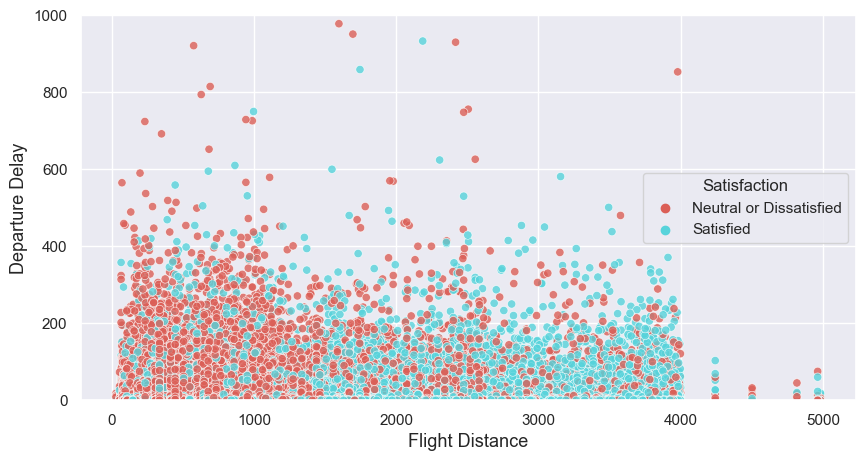

In [15]:
sb.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10,5), dpi=100)
sb.scatterplot(data=AirlineData, x='Flight Distance', y='Departure Delay', hue='Satisfaction', palette='hls', alpha=0.8)
plt.ylim(0,1000);

#### Observations: The majority of passengers feel fine with the slight delay in departure with longer flight which means departure delay is not a factor for long-distance flights. However, travelers with short flight distances seem unhappy with the delayed departure.

#### Departure Delay

In [16]:
#We would like to check if the customer satisfaction is affected based on departure delay.
departdelay = AirlineData[['Departure Delay','Satisfaction']]
nodelay = departdelay[departdelay['Departure Delay'] == 0]
delay = departdelay[departdelay['Departure Delay'] != 0]

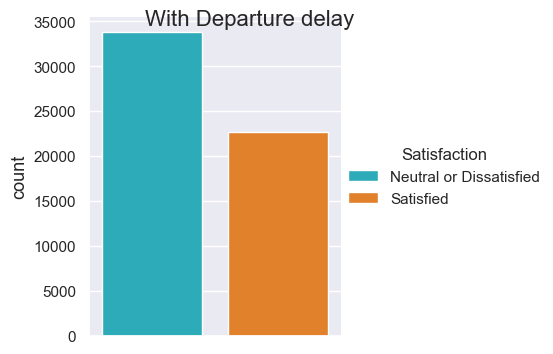

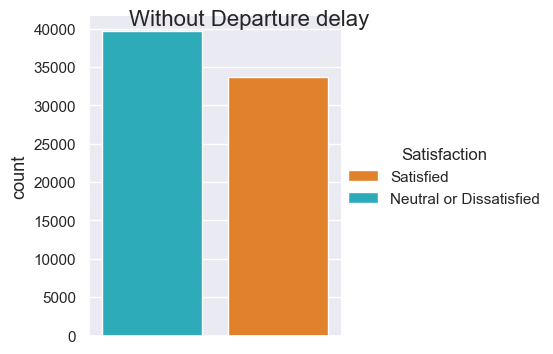

In [17]:
palette = {"Neutral or Dissatisfied":"tab:cyan",
           "Satisfied":"tab:orange"
          }

g = sb.FacetGrid(delay, height = 4, aspect = 1, hue ="Satisfaction", palette = palette)
g.map_dataframe(sb.countplot, x="Satisfaction", order=['Neutral or Dissatisfied', 'Satisfied'])
g.set(xticklabels=[])  
g.set(xlabel=None)
g.fig.suptitle('With Departure delay',fontsize=16)
g.add_legend()

g = sb.FacetGrid(nodelay, height = 4,aspect = 1, hue ="Satisfaction", palette = palette)
g.map_dataframe(sb.countplot, x="Satisfaction", order=['Neutral or Dissatisfied', 'Satisfied'])
g.set(xticklabels=[])  
g.set(xlabel=None)
g.fig.suptitle('Without Departure delay',fontsize=16)
g.add_legend()

#### Observations: Departure delay is not a key factor for overall satisfication. Even when no flight delay, majority of customers reported feeling unsatisfied.

### Handling the outliers with IQR

In [18]:
Q1 = (AirlineData[['Flight Distance', 'Departure Delay','Arrival Delay']]).quantile(0.25)
Q3 = (AirlineData[['Flight Distance','Departure Delay','Arrival Delay']]).quantile(0.75)
IQR = Q3-Q1

max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)

AirlineData['Flight Distance'].mask(AirlineData['Flight Distance']>max['Flight Distance'],max['Flight Distance'],inplace=True)
AirlineData['Departure Delay'].mask(AirlineData['Departure Delay']>max['Departure Delay'],max['Departure Delay'],inplace=True)
AirlineData['Arrival Delay'].mask(AirlineData['Arrival Delay']>max['Arrival Delay'],max['Arrival Delay'],inplace=True)


### Converting the 0 rating to the mean value('0' means 'Not applicable').

In [19]:
DepartureAndArrivalTimeConvenienceCol = AirlineData['Departure and Arrival Time Convenience']
DepartureAndArrivalTimeConvenienceCol.replace(to_replace = 0, value = round(DepartureAndArrivalTimeConvenienceCol.mean()), inplace=True)

EaseOfOnlineBookingCol = AirlineData['Ease of Online Booking']
EaseOfOnlineBookingCol.replace(to_replace = 0, value = round(EaseOfOnlineBookingCol.mean()), inplace=True)

CheckInServiceCol = AirlineData['Check-in Service']
CheckInServiceCol.replace(to_replace = 0, value = round(CheckInServiceCol.mean()), inplace=True)

OnlineBoardingCol = AirlineData['Online Boarding']
OnlineBoardingCol.replace(to_replace = 0, value = round(OnlineBoardingCol.mean()), inplace=True)

GateLocationCol = AirlineData['Gate Location']
GateLocationCol.replace(to_replace = 0, value = round(GateLocationCol.mean()), inplace=True)

OnBoardServiceCol = AirlineData['On-board Service']
OnBoardServiceCol.replace(to_replace = 0, value = round(OnBoardServiceCol.mean()), inplace=True)

SeatComfortCol = AirlineData['Seat Comfort']
SeatComfortCol.replace(to_replace = 0, value = round(SeatComfortCol.mean()), inplace=True)

LegRoomServiceCol = AirlineData['Leg Room Service']
LegRoomServiceCol.replace(to_replace = 0, value = round(LegRoomServiceCol.mean()), inplace=True)

CleanlinessCol = AirlineData['Cleanliness']
CleanlinessCol.replace(to_replace = 0, value = round(CleanlinessCol.mean()), inplace=True)

FoodAndDrinkCol = AirlineData['Food and Drink']
FoodAndDrinkCol.replace(to_replace = 0, value = round(FoodAndDrinkCol.mean()), inplace=True)

InFlightServiceCol = AirlineData['In-flight Service']
InFlightServiceCol.replace(to_replace = 0, value = round(InFlightServiceCol.mean()), inplace=True)

InFlightWifiCol = AirlineData['In-flight Wifi Service']
InFlightWifiCol.replace(to_replace = 0, value = round(InFlightWifiCol.mean()), inplace=True)

InFlightEntertainmentCol = AirlineData['In-flight Entertainment']
InFlightEntertainmentCol.replace(to_replace = 0, value = round(InFlightEntertainmentCol.mean()), inplace=True)

BaggageHandlingCol = AirlineData['Baggage Handling']
BaggageHandlingCol.replace(to_replace = 0, value = round(BaggageHandlingCol.mean()), inplace=True)


# EDA

## Checking for the nature of dataset - balanced or imbalanced

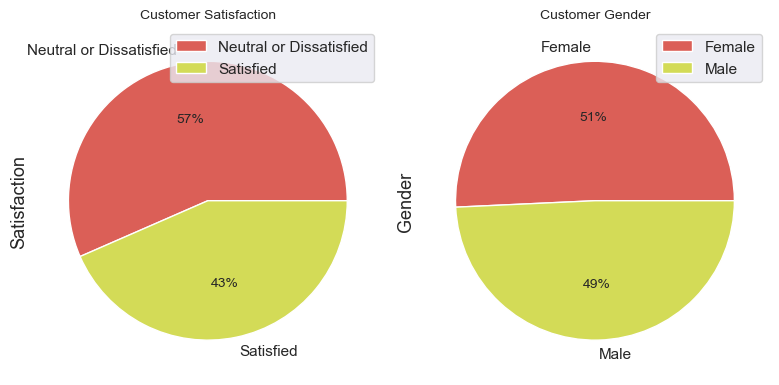

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

AirlineData["Satisfaction"].value_counts(dropna=False).plot(kind="pie", autopct='%1.0f%%', colors=sb.color_palette("hls"), legend=True, ax=axes[0])
axes[0].set_title("Customer Satisfaction")

AirlineData["Gender"].value_counts(dropna=False).plot(kind="pie", autopct='%1.0f%%', colors=sb.color_palette("hls"), legend=True, ax=axes[1])
axes[1].set_title("Customer Gender")

plt.tight_layout()
plt.show()

#### Observations: As we are analysing the customer satisfaction. We are checking the distribution of the survey. Based on the graph, the numbers(43% & 57%) are still tolerable so we consider the survey is balanced and its not biased. Hence, no modification to the data is required.

## Gender VS Satisfaction

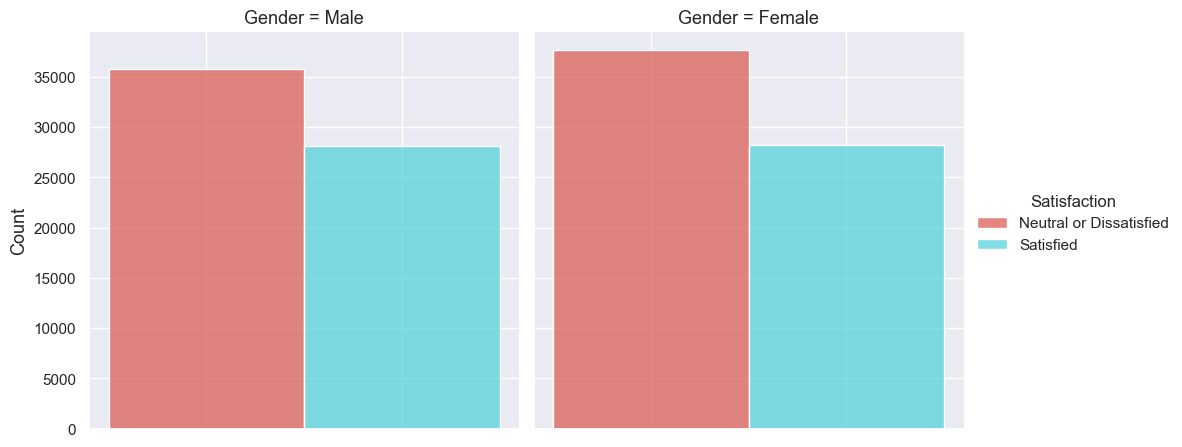

In [21]:
g = sb.FacetGrid(AirlineData, col="Gender", height = 5, hue ="Satisfaction", palette = 'hls')
g.map_dataframe(sb.histplot, x="Satisfaction")
g.set(xticklabels=[])  
g.set(xlabel=None)
g.add_legend()

#### Observations: Gender does not play a significant role in satisfaction, as both genders reported similar levels of satisfaction or dissatisfaction based on their ratings. Men and women seem to be concerned about the same factors.

## Customer Type VS Satisfaction

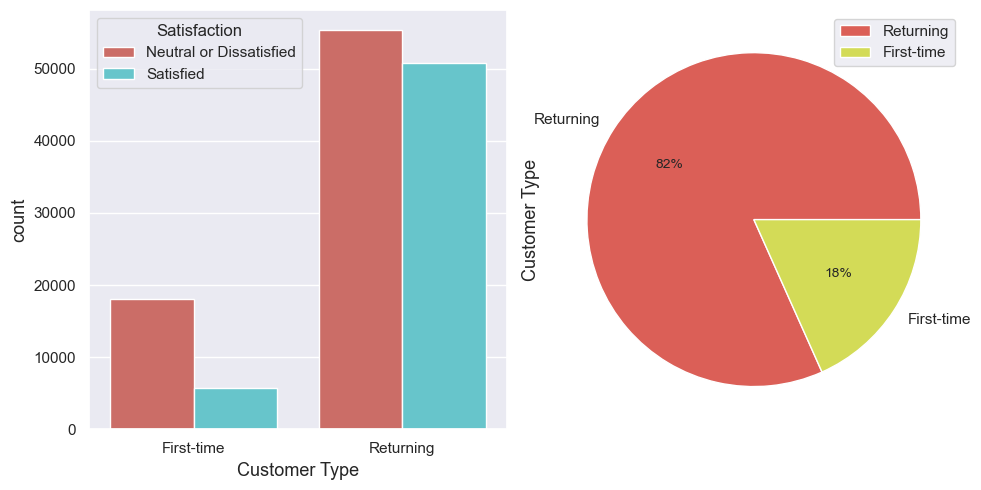

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sb.countplot(x ='Customer Type', hue = "Satisfaction", palette = 'hls', ax=axes[0],data = AirlineData)

AirlineData["Customer Type"].value_counts(dropna=False).plot(kind="pie", autopct='%1.0f%%', colors=sb.color_palette("hls"), legend=True, ax=axes[1])

plt.tight_layout()
plt.show()

#### Observations:
#### First-time passengers are generally dissatisfied with the flight

#### The number of returning passengers (82%) for the airline is high, but the level of dissatisfaction is high regardless of loyalty. Airlines must pay attention to retaining loyal customers. 

#### Airline should also consider how they can attract new customers. For example, they can improve on their marketing stratergies. 



## Class VS Flight Distance  & Flight Distance VS Satisfaction

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

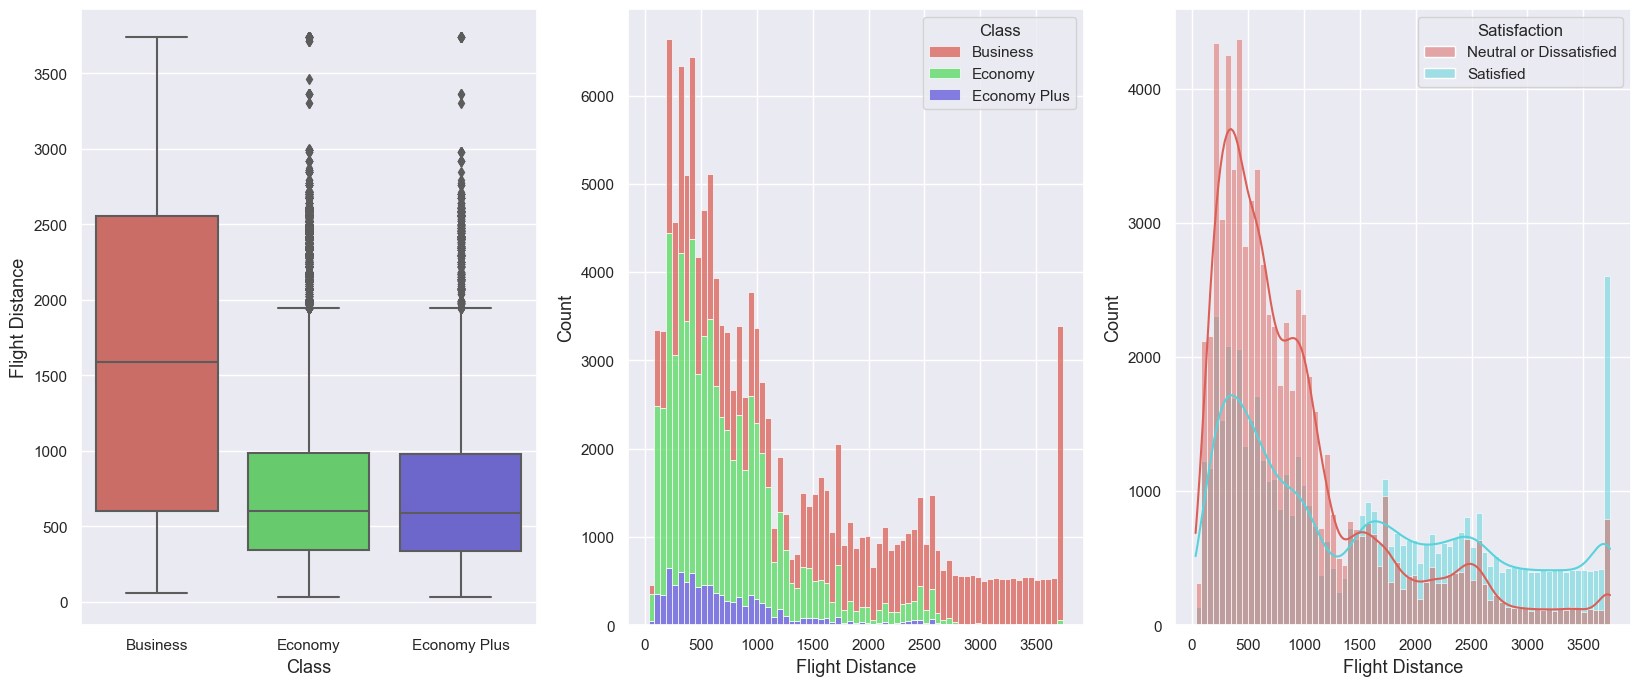

In [23]:
f, ax = plt.subplots(1, 3, figsize = (20,8))
sb.boxplot(x = "Class", y = "Flight Distance", palette = "hls", data = AirlineData, ax = ax[0])
sb.histplot(AirlineData, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "hls", linewidth = .5, ax = ax[1]);
sb.histplot(x='Flight Distance',hue="Satisfaction",data=AirlineData,kde=True,palette="hls",ax = ax[2])

#### Observations：
#### Most of passengers with the long distance flight or with Business purpose tend to go for Business Class.
#### Passengers with long flight distance tend to be satisfied with their flight.(maybe because of fancy Business Class facilities).

## Analyzing on Pre-Boarding services

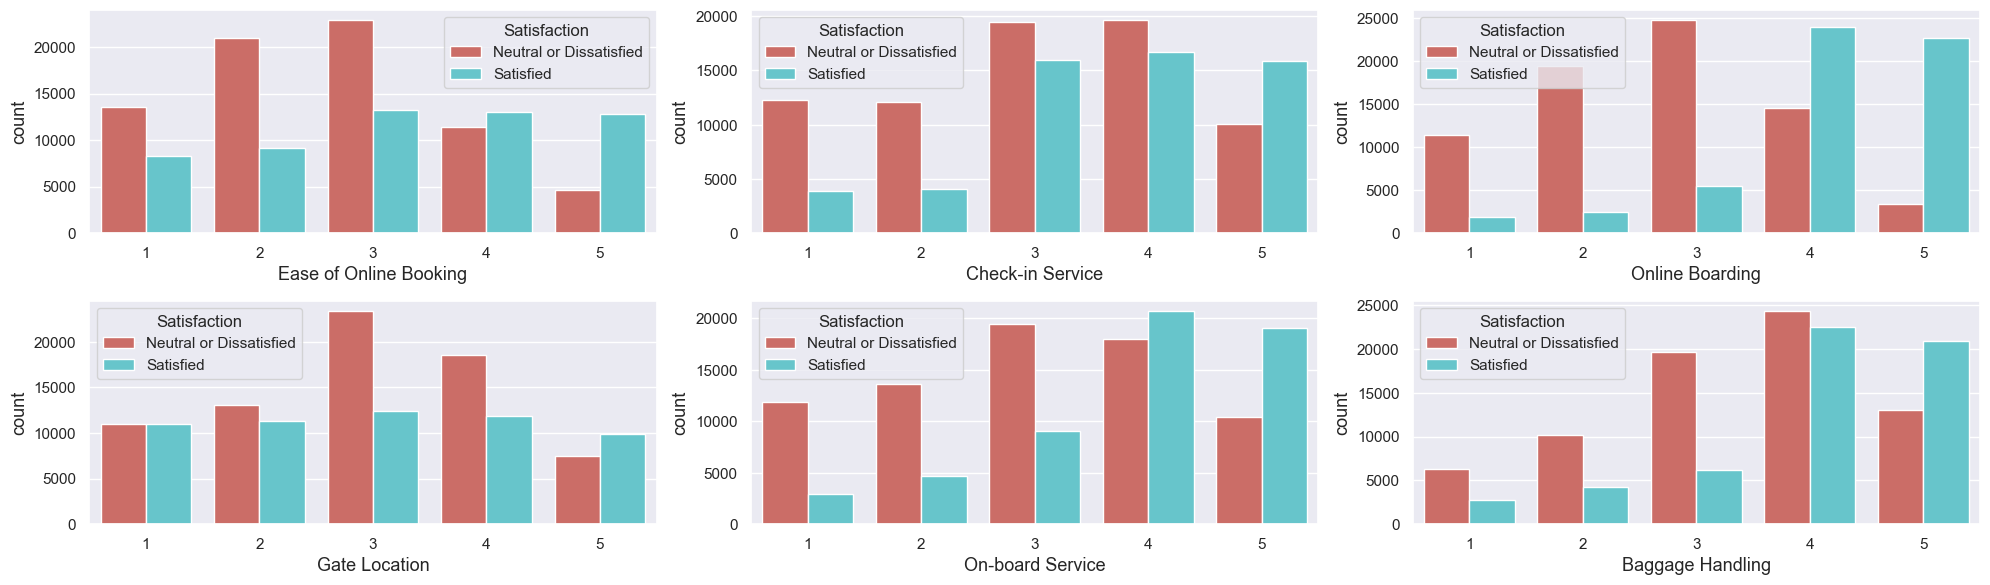

In [29]:
AirlineService = ['Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Baggage Handling']
plt.figure(figsize=(20,20))

for i in range(len(AirlineService)):
        plt.subplot(7,3,i+1)
        sb.countplot(x=AirlineData[AirlineService[i]], hue =AirlineData['Satisfaction'], palette = 'hls')    

plt.tight_layout()


#### Observations:
#### Majority of passengers rated Ease of Online Booking as 1-3.
#### Passengers seem to be satisfied with Baggage Handling since more than half of people rated it as 4-5.
#### Online Boarding and On-board Service play a critical role in determining passenger satisfaction since a majority of those who rated it between 1-3 expressed dissatisfaction with the overall service.
#### The airline should prioritize improving the dissatisfactory pre-boarding services to enhance the overall customer experience.

## Analyzing on In-Flight services 
### - Comparing the ratings for different classes

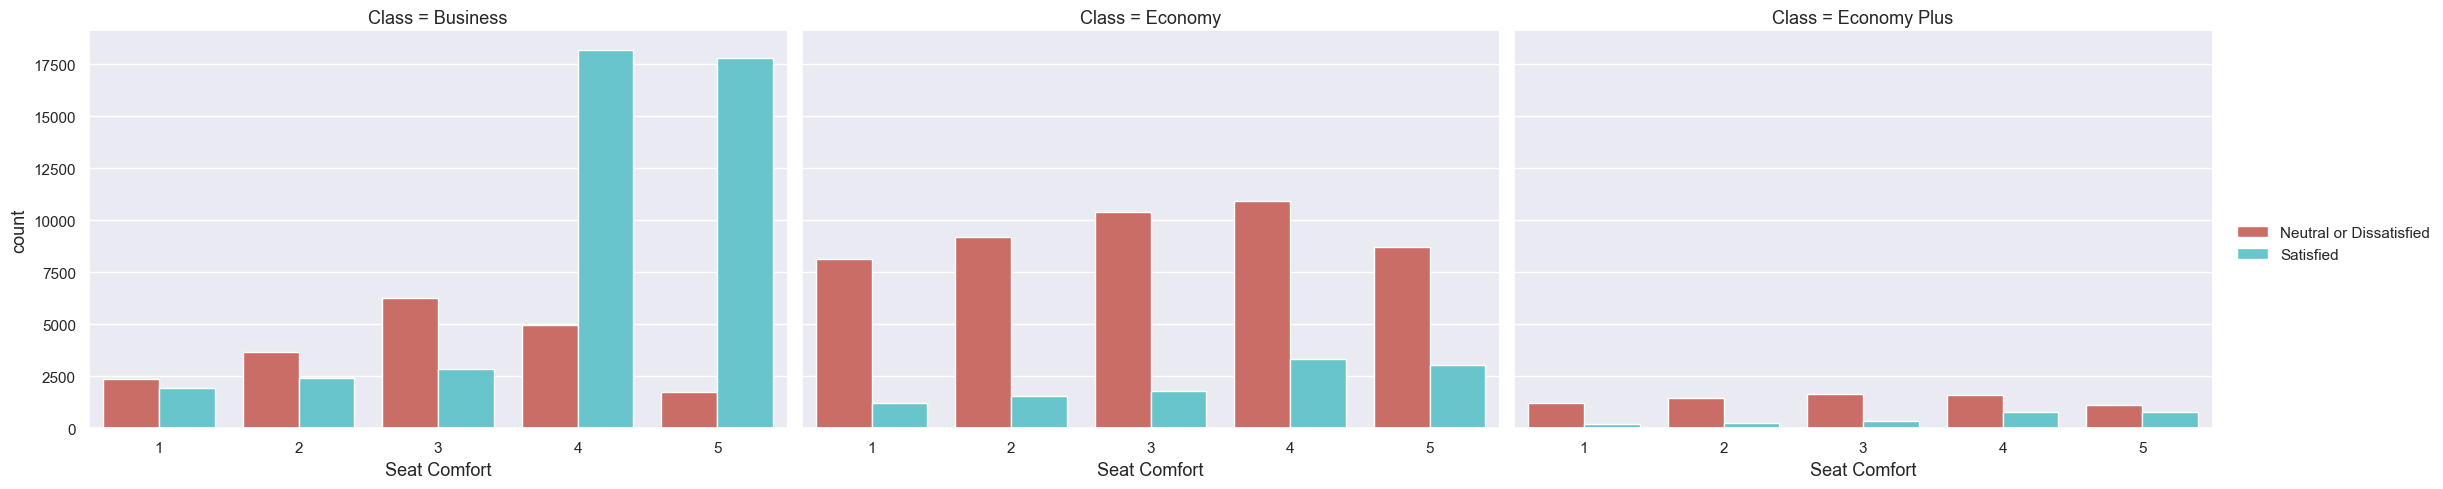

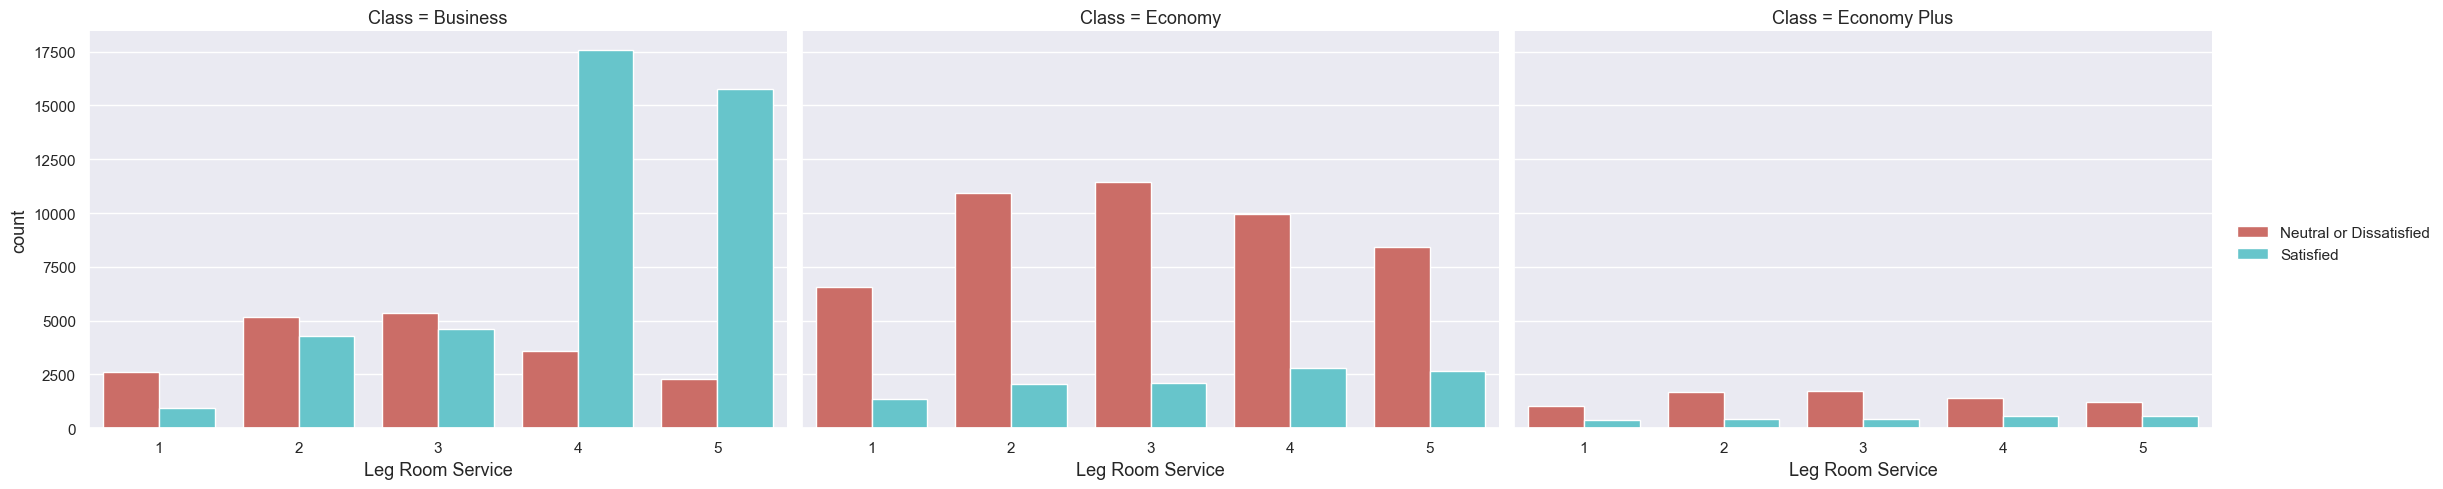

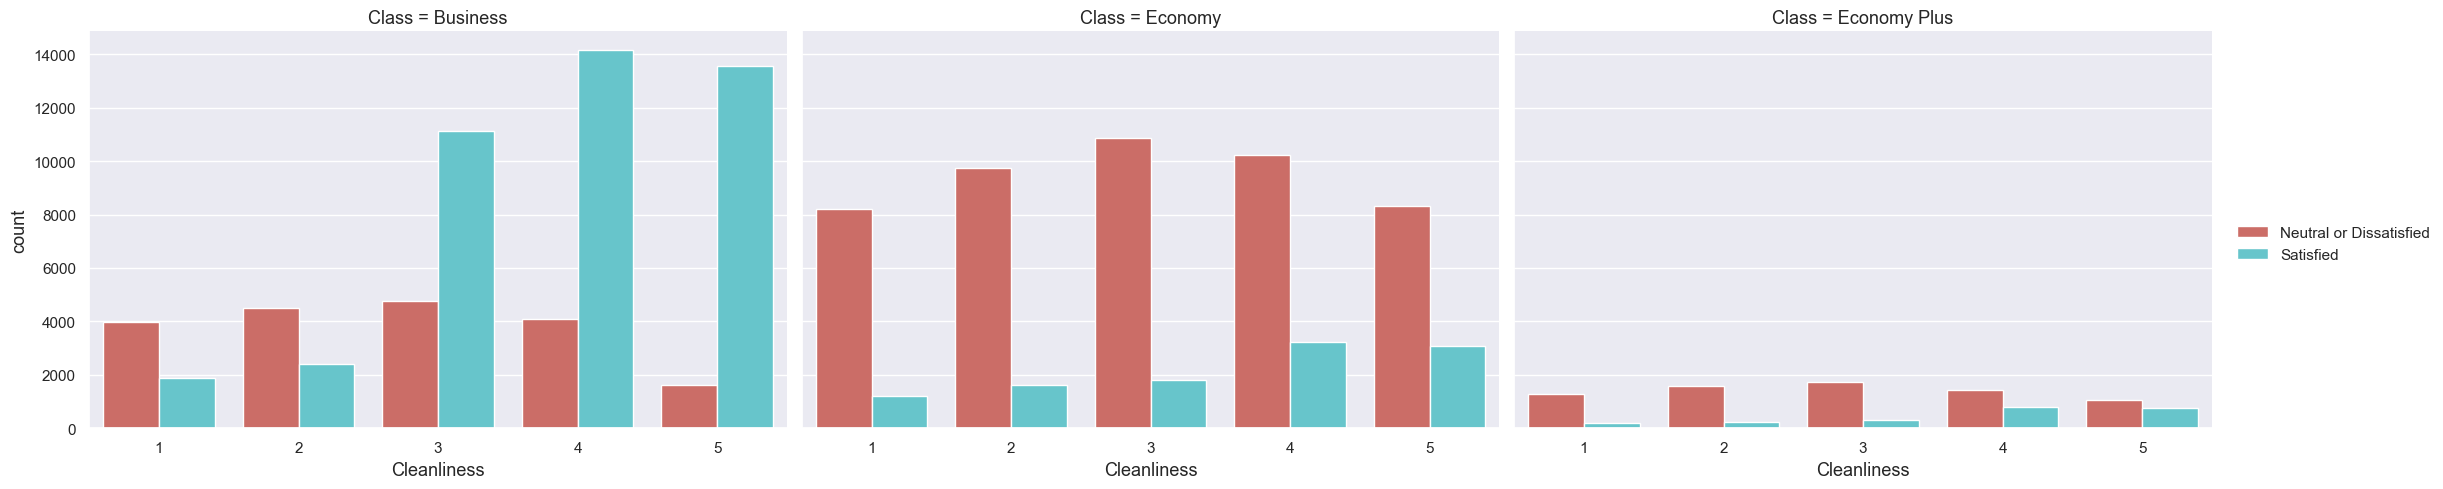

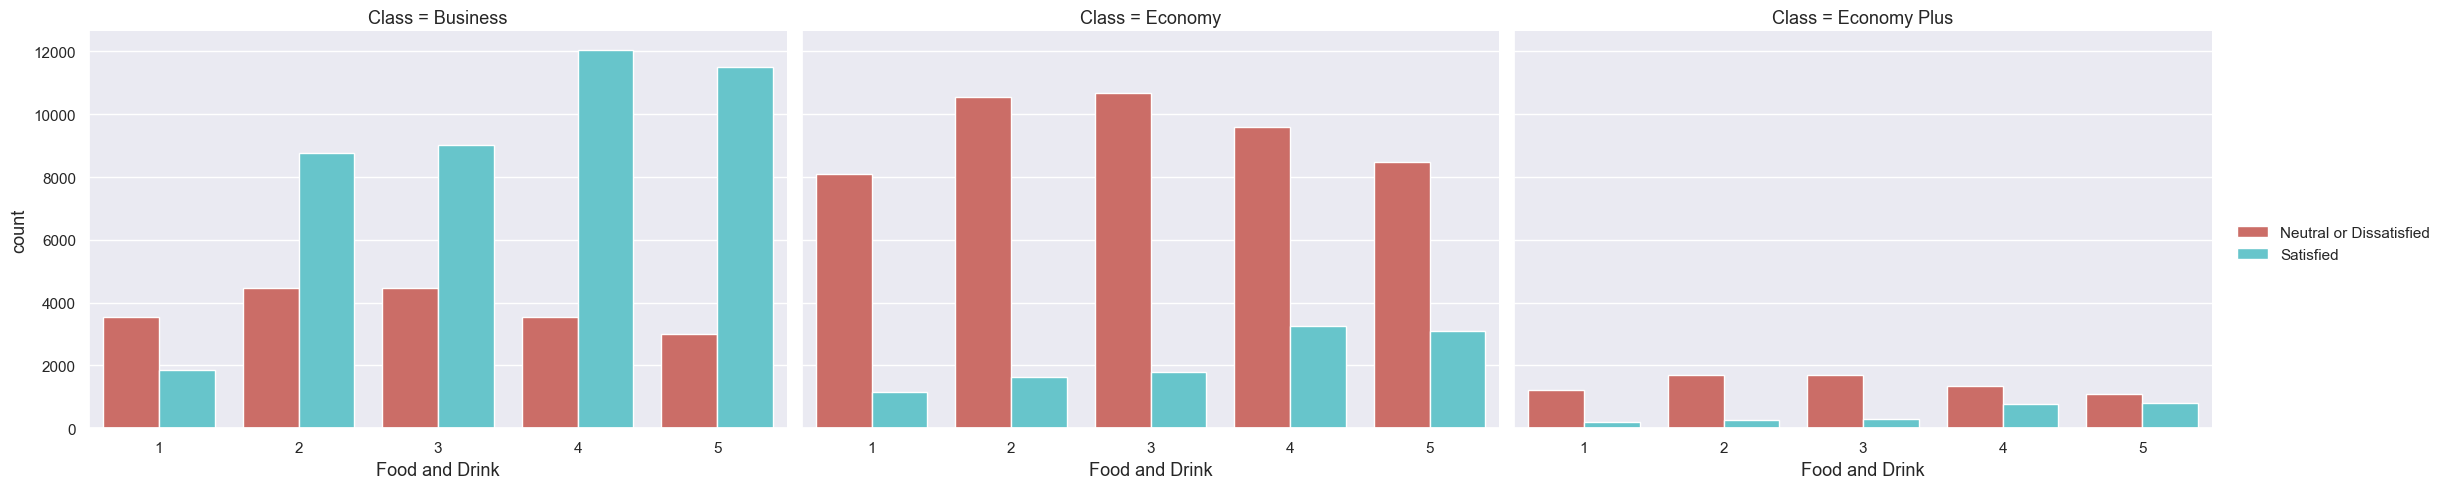

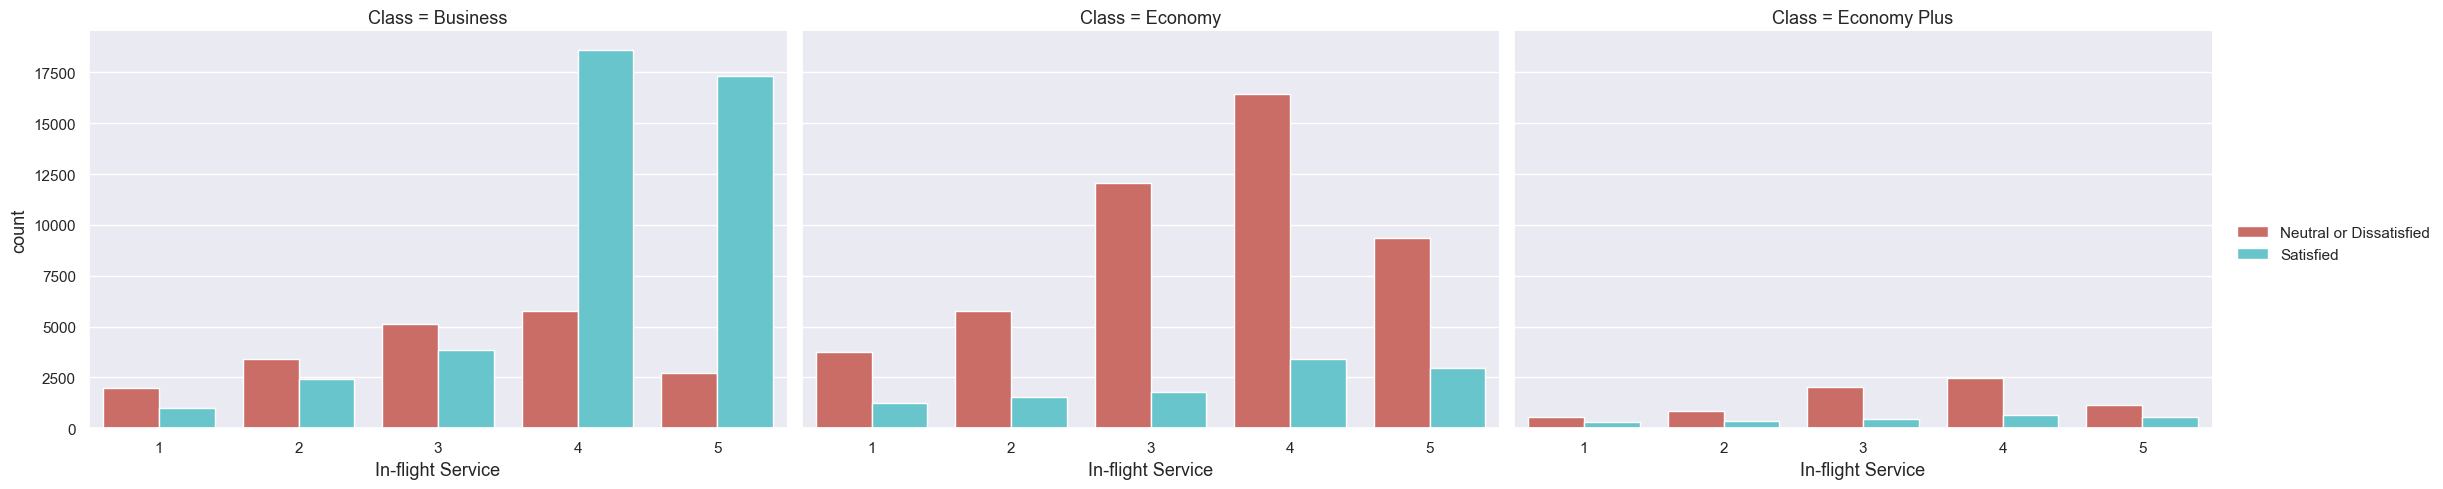

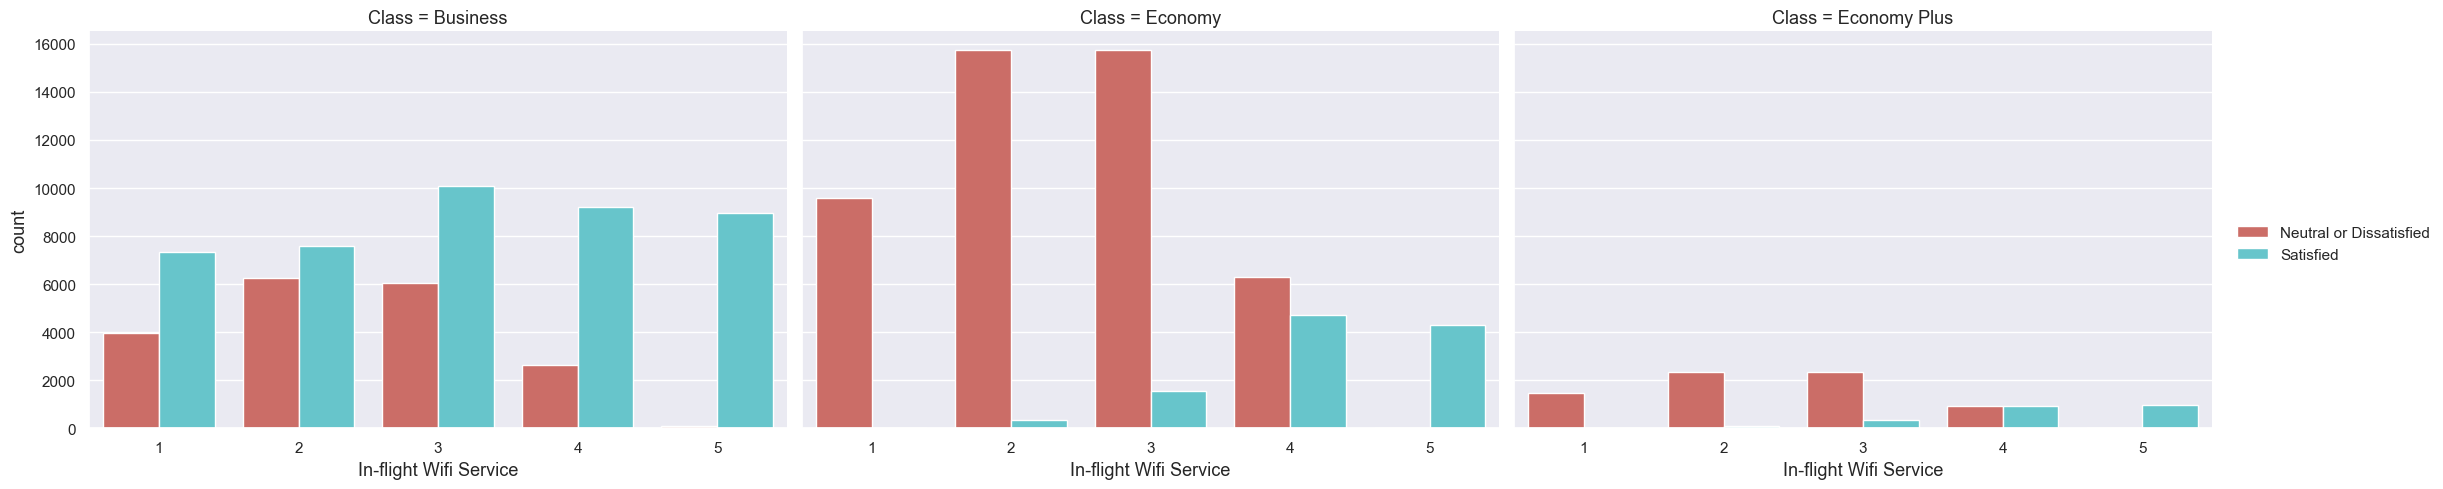

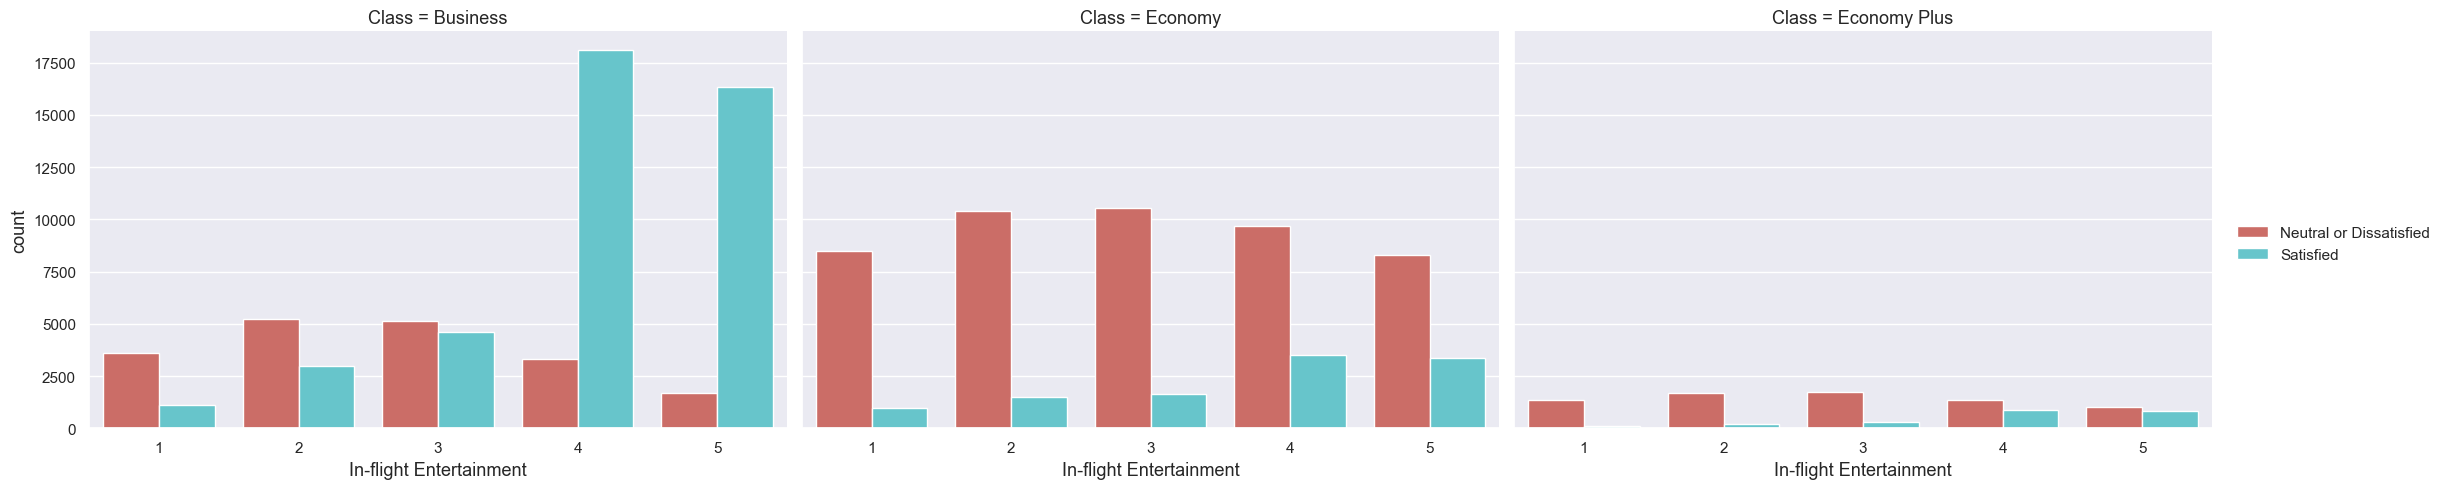

In [28]:
FlightService = ['Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment']

for i in range(len(FlightService)):
    g = sb.FacetGrid(AirlineData, col="Class" , height = 5, aspect = 1.5)
    g.map_dataframe(sb.countplot, x=FlightService[i], hue =AirlineData['Satisfaction'], palette = 'hls') 
    g.add_legend()
    #g.set(xticklabels=[])  
    #g.set(xlabel=None)


#### Observations: 
#### Business class passengers gave significantly higher satisfaction ratings for their spacious leg room and almost all in-flight services, while feeling average for wifi service.
#### Majority of passengers from Business Class are satisfied with overall flight service based on these in-flight services.
#### Economy class passengers mostly rated the services as average, but expressed slight dissatisfaction with wifi service, while expressing slight satisfaction with in-flight service.
#### Most of passengers from Economy Class were dissatisfied with overall flight service.
#### Economy Plus passengers rated all services as so-so, with fewer passengers choosing this class.
#### Based on the ratings,it seems that the wifi speed in the business class section is average, whereas passengers perceive the wifi services in the economy class area to be of poor quality.
#### It conclude that the airline is attentive and provided equal service to all customers, resulting in relatively high satisfaction ratings across all classes.

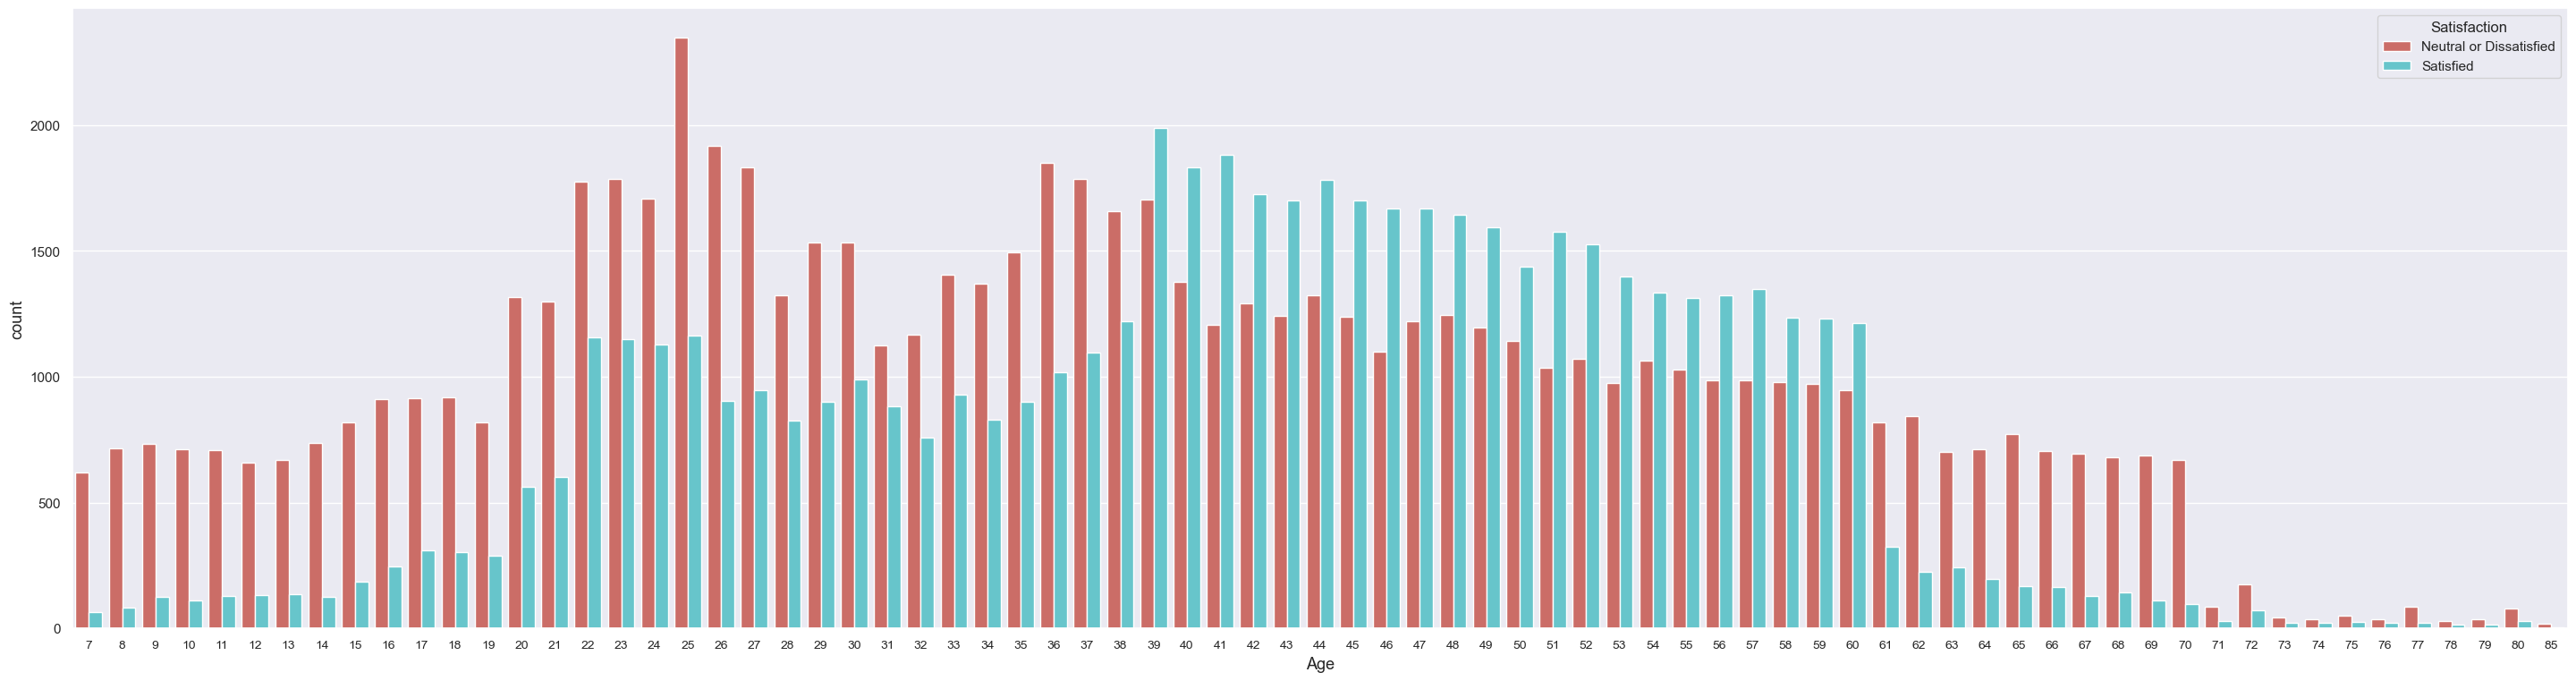

In [26]:
f = plt.figure(figsize=(36, 9))
sb.countplot(x = AirlineData["Age"], hue = AirlineData["Satisfaction"], palette = 'hls')
plt.xticks(fontsize=10)
plt.show()

#### Observations: 
#### we can say people from age group 39 - 60 expectations are high.
#### 7-38 years old is generally neutral or dissatisfied with the flight.
#### 39-60 years old is generally satisfied with the flight.
#### 60 years old above is generally neutral or dissatisfied with the flight.
#### People who are in early 20's likes to fly more than other age categories.






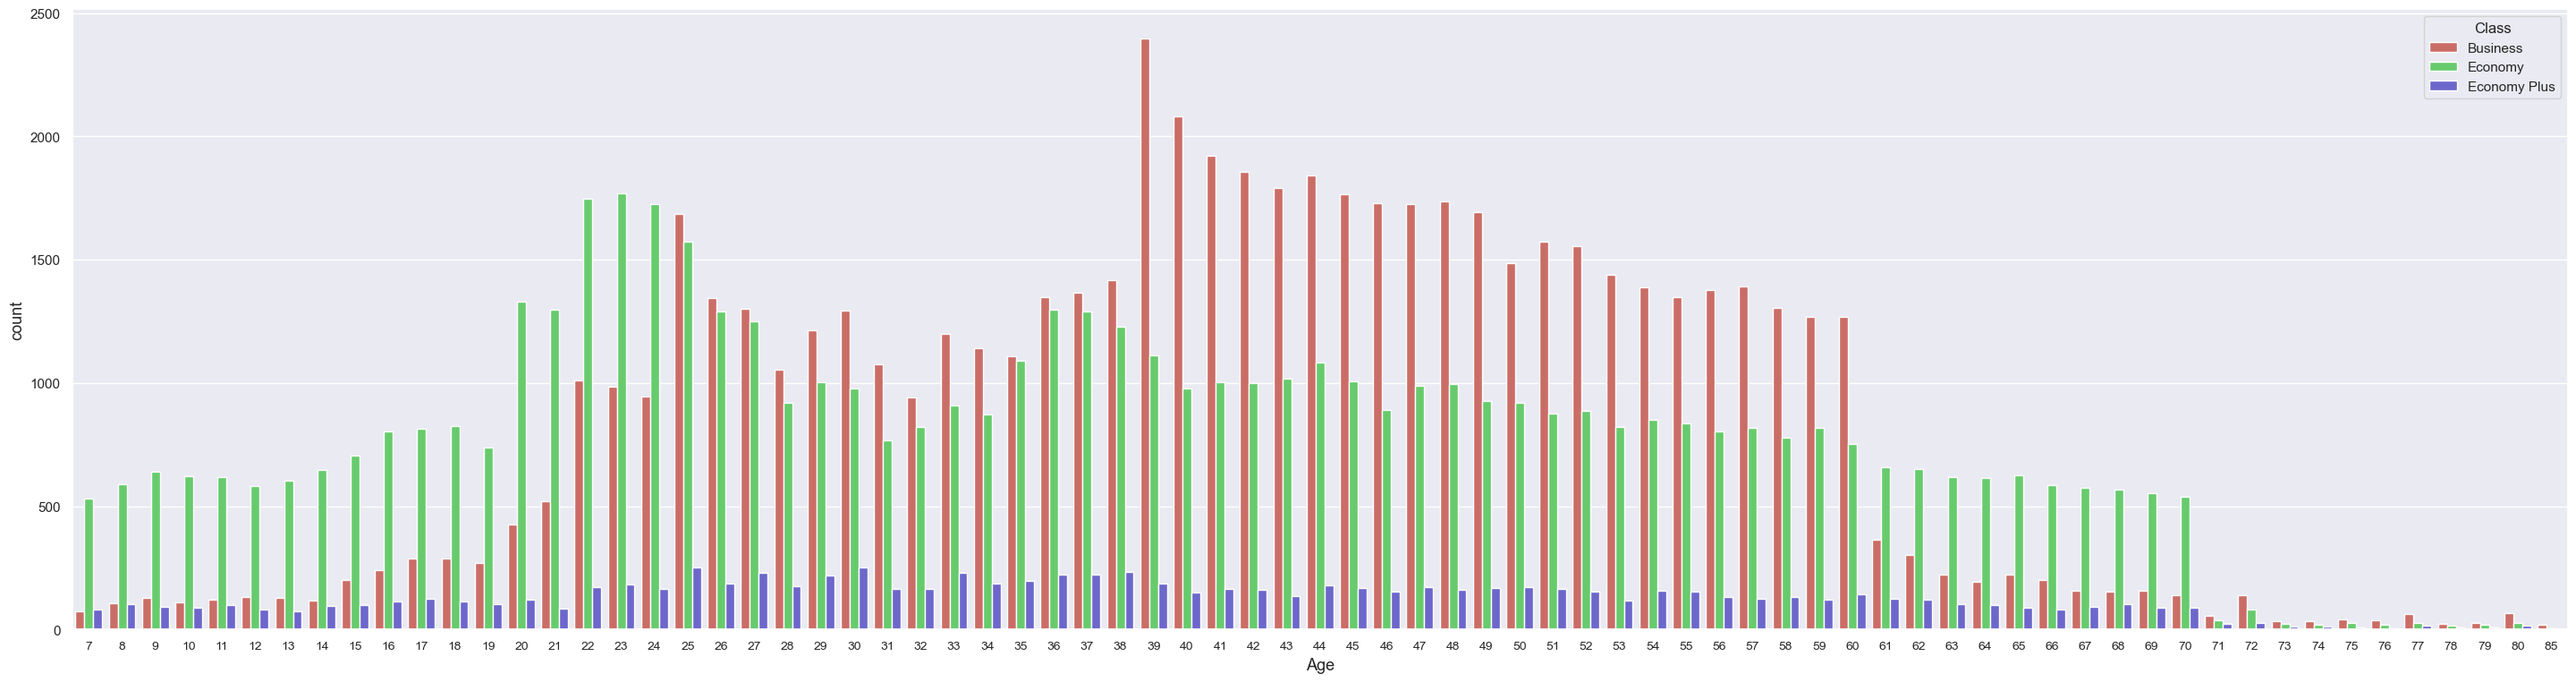

In [27]:
f = plt.figure(figsize=(36, 9))
sb.countplot(x = AirlineData["Age"], hue = AirlineData["Class"], palette = 'hls')
plt.xticks(fontsize=10)
plt.show()

#### Observation:
#### Passengers with 7-24 years old prefer to travel in economy class. While,  those with 26-80 years old prefer to travel in business class.

## Splitting dataset according to generations
Analyzing data by generation can be insightful for data analysis as it can reveal differences in behavior and attitudes among people of different ages. 

In [30]:
def age_category(df):
    df["Age_group"] = pd.cut(x=df['Age'], bins=[0,9,25,41,57,67,76,94], labels=["0-9","10-25","26-41","42-57","58-67","68-76","77-94"])
    return df
# Call function
AirlineData = age_category(AirlineData)
group_0_9 = AirlineData[AirlineData["Age_group"] == '0-9']
group_10_25 = AirlineData[AirlineData["Age_group"] == '10-25']
group_26_41 = AirlineData[AirlineData["Age_group"] == '26-41']
group_42_57 = AirlineData[AirlineData["Age_group"] == '42-57']
group_58_67 = AirlineData[AirlineData["Age_group"] == '58-67']
group_68_76 = AirlineData[AirlineData["Age_group"] == '68-76']
group_77_94 = AirlineData[AirlineData["Age_group"] == '77-94']

#### We think some of the aspects will vary upon different age groups. Thus, we are comparing In Flight Wifi Servie, Seat Comfort, Leg Room Service, Food and Drink and In Flight entertainment accross different age groups.

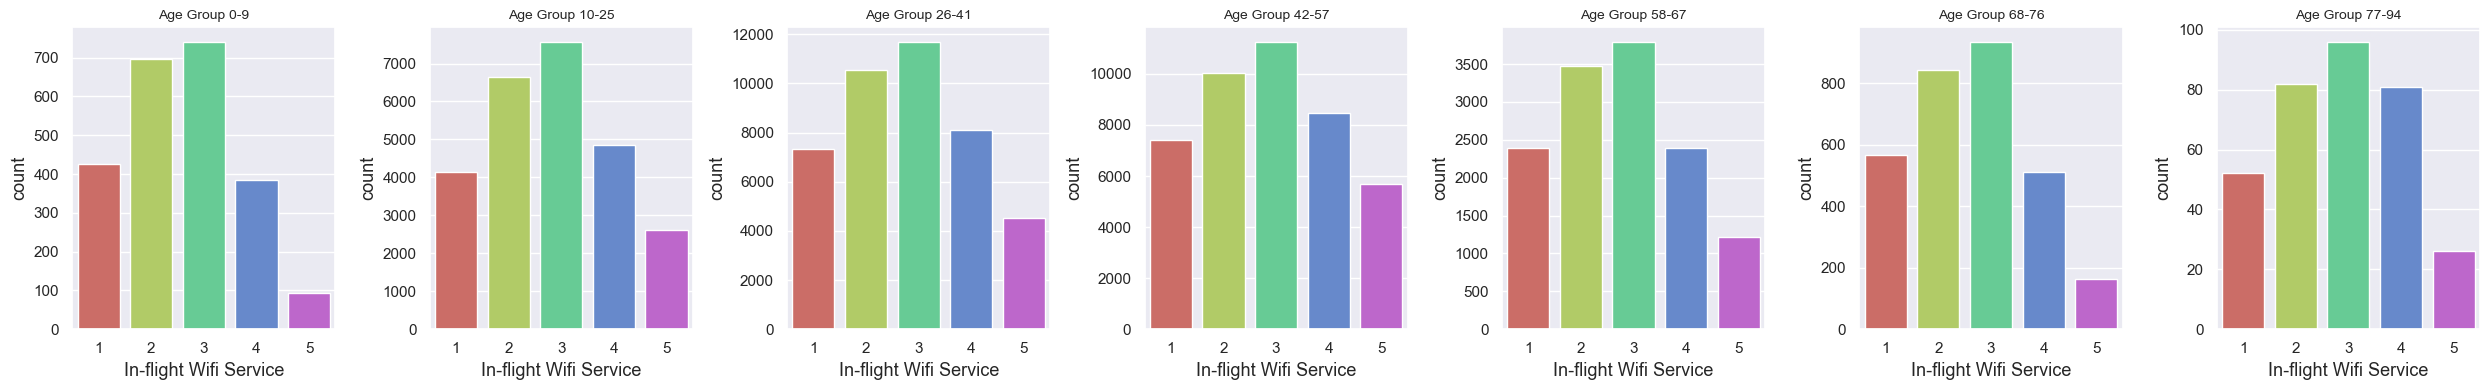

In [31]:
fig=plt.figure(figsize=(25,4))
ax1 = fig.add_subplot(1, 7,1)
ax2 = fig.add_subplot(1, 7,2)
ax3 = fig.add_subplot(1, 7, 3)
ax4 = fig.add_subplot(1, 7, 4)
ax5 = fig.add_subplot(1, 7, 5)
ax6 = fig.add_subplot(1, 7, 6)
ax7 = fig.add_subplot(1, 7, 7)
sb.countplot(x = group_0_9["In-flight Wifi Service"], ax=ax1, palette = 'hls').set(title='Age Group 0-9')
sb.countplot(x = group_10_25["In-flight Wifi Service"], ax=ax2, palette = 'hls').set(title='Age Group 10-25')
sb.countplot(x = group_26_41["In-flight Wifi Service"], ax=ax3, palette = 'hls').set(title='Age Group 26-41')
sb.countplot(x = group_42_57["In-flight Wifi Service"], ax=ax4, palette = 'hls').set(title='Age Group 42-57')
sb.countplot(x = group_58_67["In-flight Wifi Service"], ax=ax5, palette = 'hls').set(title='Age Group 58-67')
sb.countplot(x = group_68_76["In-flight Wifi Service"], ax=ax6, palette = 'hls').set(title='Age Group 68-76')
sb.countplot(x = group_77_94["In-flight Wifi Service"], ax=ax7, palette = 'hls').set(title='Age Group 77-94')
fig.tight_layout()
plt.show()

#### In-flight Wifi Service has an average rating for all age groups.

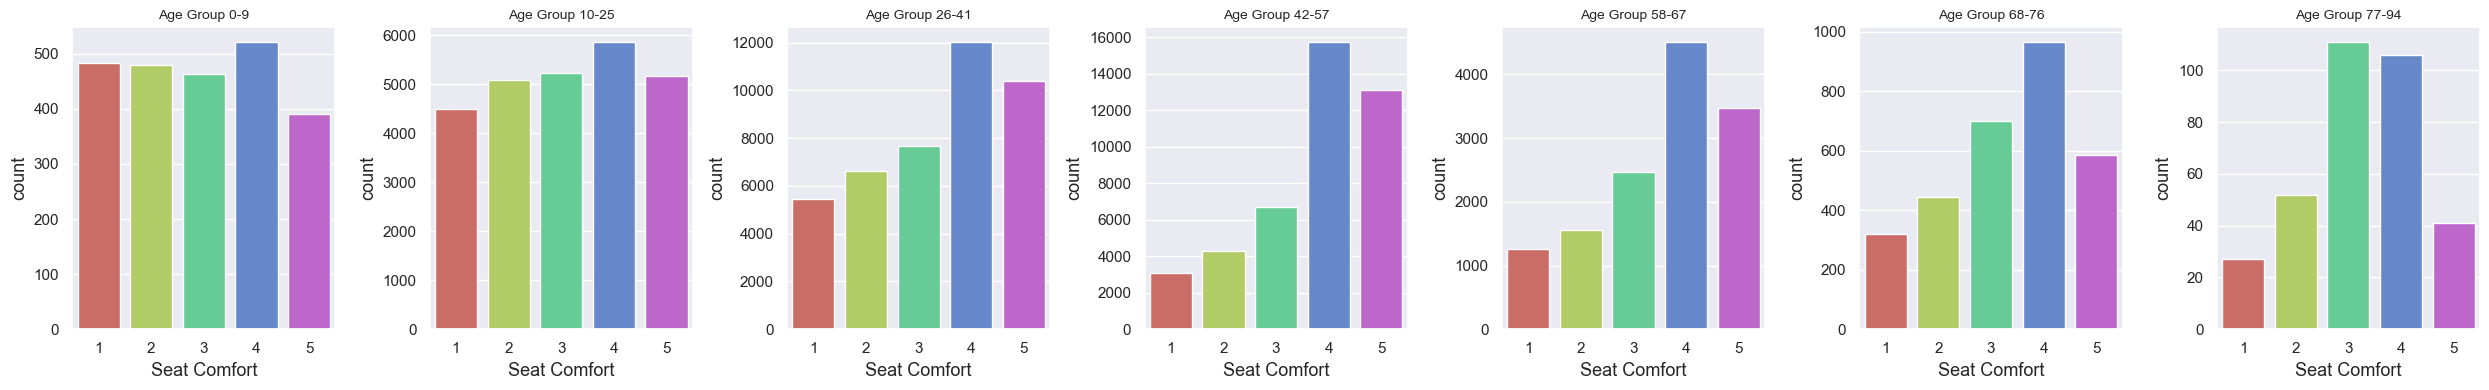

In [32]:
fig=plt.figure(figsize=(25,4))
ax1 = fig.add_subplot(1, 7,1)
ax2 = fig.add_subplot(1, 7,2)
ax3 = fig.add_subplot(1, 7, 3)
ax4 = fig.add_subplot(1, 7, 4)
ax5 = fig.add_subplot(1, 7, 5)
ax6 = fig.add_subplot(1, 7, 6)
ax7 = fig.add_subplot(1, 7, 7)
sb.countplot(x = group_0_9["Seat Comfort"], ax=ax1, palette = 'hls').set(title='Age Group 0-9')
sb.countplot(x = group_10_25["Seat Comfort"], ax=ax2, palette = 'hls').set(title='Age Group 10-25')
sb.countplot(x = group_26_41["Seat Comfort"], ax=ax3, palette = 'hls').set(title='Age Group 26-41')
sb.countplot(x = group_42_57["Seat Comfort"], ax=ax4, palette = 'hls').set(title='Age Group 42-57')
sb.countplot(x = group_58_67["Seat Comfort"], ax=ax5, palette = 'hls').set(title='Age Group 58-67')
sb.countplot(x = group_68_76["Seat Comfort"], ax=ax6, palette = 'hls').set(title='Age Group 68-76')
sb.countplot(x = group_77_94["Seat Comfort"], ax=ax7, palette = 'hls').set(title='Age Group 77-94')
fig.tight_layout()
plt.show()

#### People on the age group 0-9 and 10-25 seems dissatisfied with the seat comfort. While, other age category people are comfortable with the seats. Higer rating for above age 26 maybe because many of them travel in business class (as found above) and seats are generally comfortable in business class (found above).

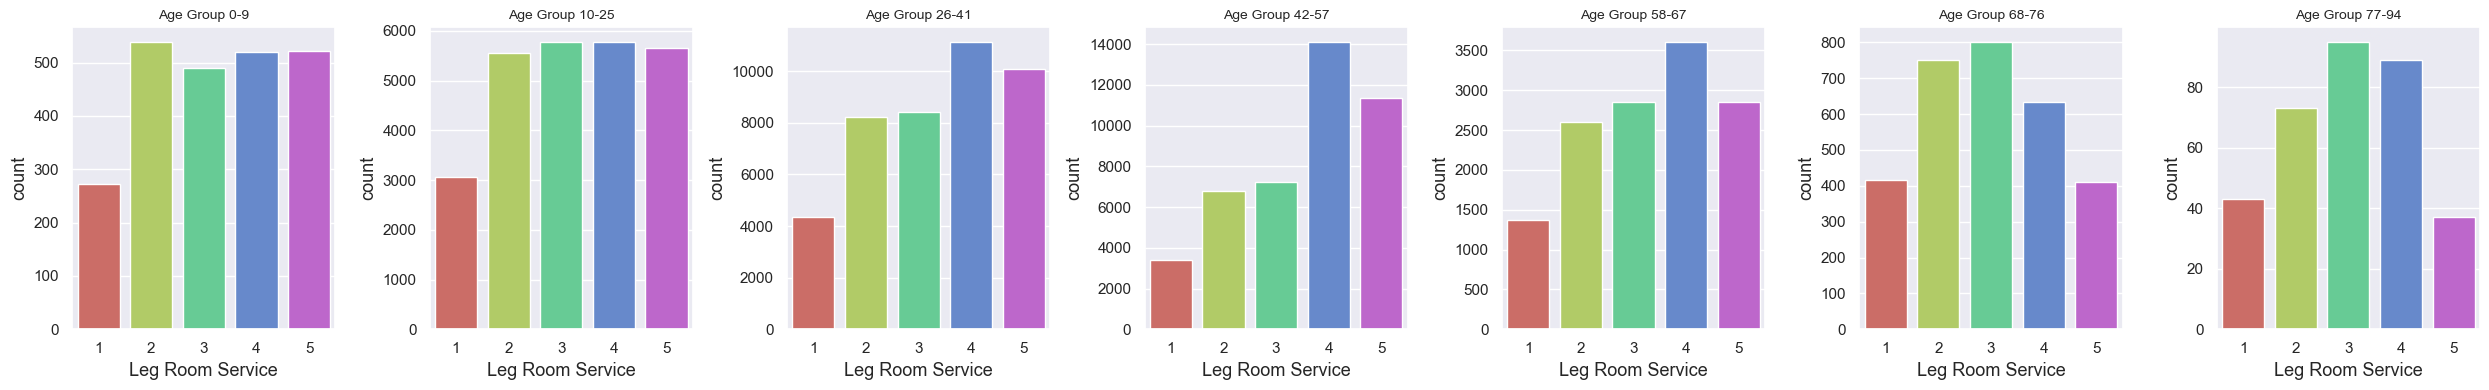

In [33]:
fig=plt.figure(figsize=(25,4))
ax1 = fig.add_subplot(1, 7,1)
ax2 = fig.add_subplot(1, 7,2)
ax3 = fig.add_subplot(1, 7, 3)
ax4 = fig.add_subplot(1, 7, 4)
ax5 = fig.add_subplot(1, 7, 5)
ax6 = fig.add_subplot(1, 7, 6)
ax7 = fig.add_subplot(1, 7, 7)
sb.countplot(x = group_0_9["Leg Room Service"], ax=ax1, palette = 'hls').set(title='Age Group 0-9')
sb.countplot(x = group_10_25["Leg Room Service"], ax=ax2, palette = 'hls').set(title='Age Group 10-25')
sb.countplot(x = group_26_41["Leg Room Service"], ax=ax3, palette = 'hls').set(title='Age Group 26-41')
sb.countplot(x = group_42_57["Leg Room Service"], ax=ax4, palette = 'hls').set(title='Age Group 42-57')
sb.countplot(x = group_58_67["Leg Room Service"], ax=ax5, palette = 'hls').set(title='Age Group 58-67')
sb.countplot(x = group_68_76["Leg Room Service"], ax=ax6, palette = 'hls').set(title='Age Group 68-76')
sb.countplot(x = group_77_94["Leg Room Service"], ax=ax7, palette = 'hls').set(title='Age Group 77-94')
fig.tight_layout()
plt.show()

#### People on the age group 0-9 and 10-25 seems dissatisfied with the leg room service. While, other age category people are comfortable with the leg room service. Higer rating for above age 26 maybe because many of them travel in business class (as found above) and leg room service has higher rating in business class (found above).

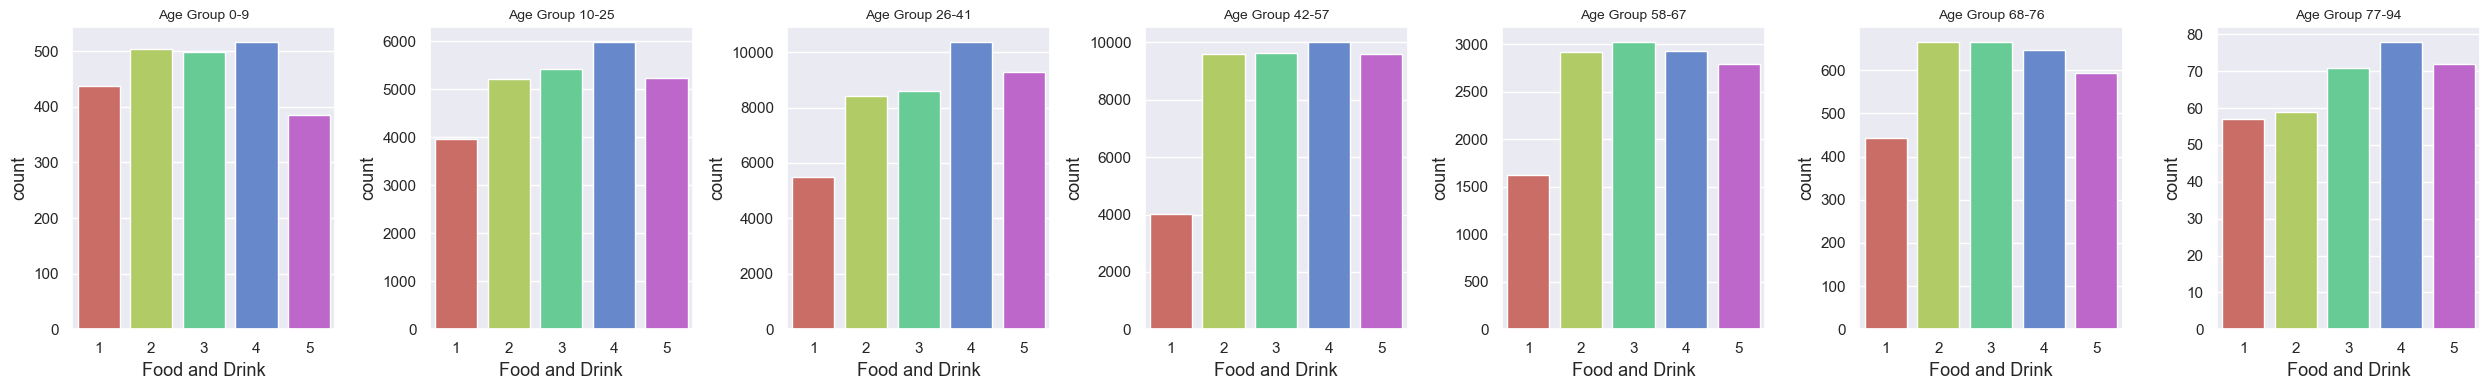

In [34]:
fig=plt.figure(figsize=(25,4))
ax1 = fig.add_subplot(1, 7,1)
ax2 = fig.add_subplot(1, 7,2)
ax3 = fig.add_subplot(1, 7, 3)
ax4 = fig.add_subplot(1, 7, 4)
ax5 = fig.add_subplot(1, 7, 5)
ax6 = fig.add_subplot(1, 7, 6)
ax7 = fig.add_subplot(1, 7, 7)
sb.countplot(x = group_0_9["Food and Drink"], ax=ax1, palette = 'hls').set(title='Age Group 0-9')
sb.countplot(x = group_10_25["Food and Drink"], ax=ax2, palette = 'hls').set(title='Age Group 10-25')
sb.countplot(x = group_26_41["Food and Drink"], ax=ax3, palette = 'hls').set(title='Age Group 26-41')
sb.countplot(x = group_42_57["Food and Drink"], ax=ax4, palette = 'hls').set(title='Age Group 42-57')
sb.countplot(x = group_58_67["Food and Drink"], ax=ax5, palette = 'hls').set(title='Age Group 58-67')
sb.countplot(x = group_68_76["Food and Drink"], ax=ax6, palette = 'hls').set(title='Age Group 68-76')
sb.countplot(x = group_77_94["Food and Drink"], ax=ax7, palette = 'hls').set(title='Age Group 77-94')
fig.tight_layout()
plt.show()

#### Food and Drink has an average rating for all age groups.

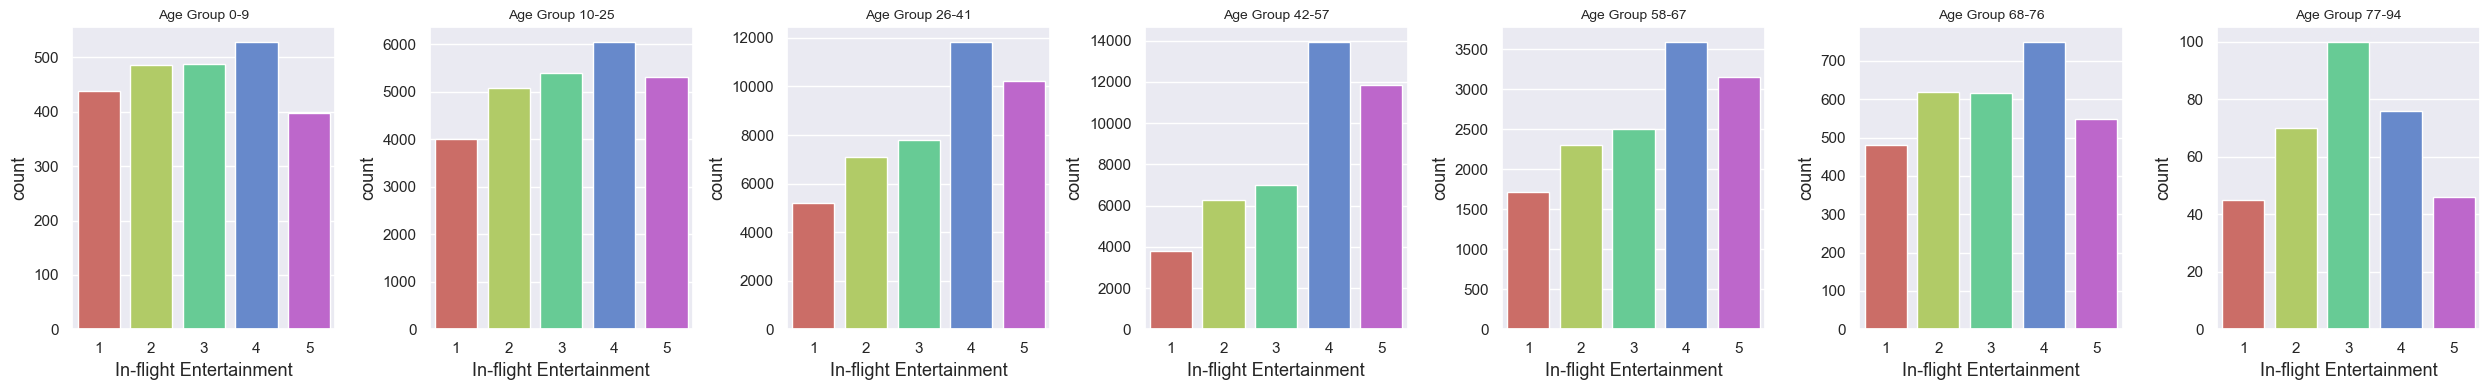

In [35]:
fig=plt.figure(figsize=(25,4))
ax1 = fig.add_subplot(1, 7,1)
ax2 = fig.add_subplot(1, 7,2)
ax3 = fig.add_subplot(1, 7, 3)
ax4 = fig.add_subplot(1, 7, 4)
ax5 = fig.add_subplot(1, 7, 5)
ax6 = fig.add_subplot(1, 7, 6)
ax7 = fig.add_subplot(1, 7, 7)
sb.countplot(x = group_0_9["In-flight Entertainment"], ax=ax1, palette = 'hls').set(title='Age Group 0-9')
sb.countplot(x = group_10_25["In-flight Entertainment"], ax=ax2, palette = 'hls').set(title='Age Group 10-25')
sb.countplot(x = group_26_41["In-flight Entertainment"], ax=ax3, palette = 'hls').set(title='Age Group 26-41')
sb.countplot(x = group_42_57["In-flight Entertainment"], ax=ax4, palette = 'hls').set(title='Age Group 42-57')
sb.countplot(x = group_58_67["In-flight Entertainment"], ax=ax5, palette = 'hls').set(title='Age Group 58-67')
sb.countplot(x = group_68_76["In-flight Entertainment"], ax=ax6, palette = 'hls').set(title='Age Group 68-76')
sb.countplot(x = group_77_94["In-flight Entertainment"], ax=ax7, palette = 'hls').set(title='Age Group 77-94')
fig.tight_layout()
plt.show()

#### Customers from gen z and millennials feel average for flight entertainment while other feel quite satisfied w in flight services

## Replacing label column "satisfaction" values with 0 and 1 (Neutral or Dissatisfied = 0 and Satisfied = 1) 

In [36]:
AirlineData['Satisfaction'].replace({'Neutral or Dissatisfied': 0, 'Satisfied': 1},inplace = True)

<AxesSubplot:>

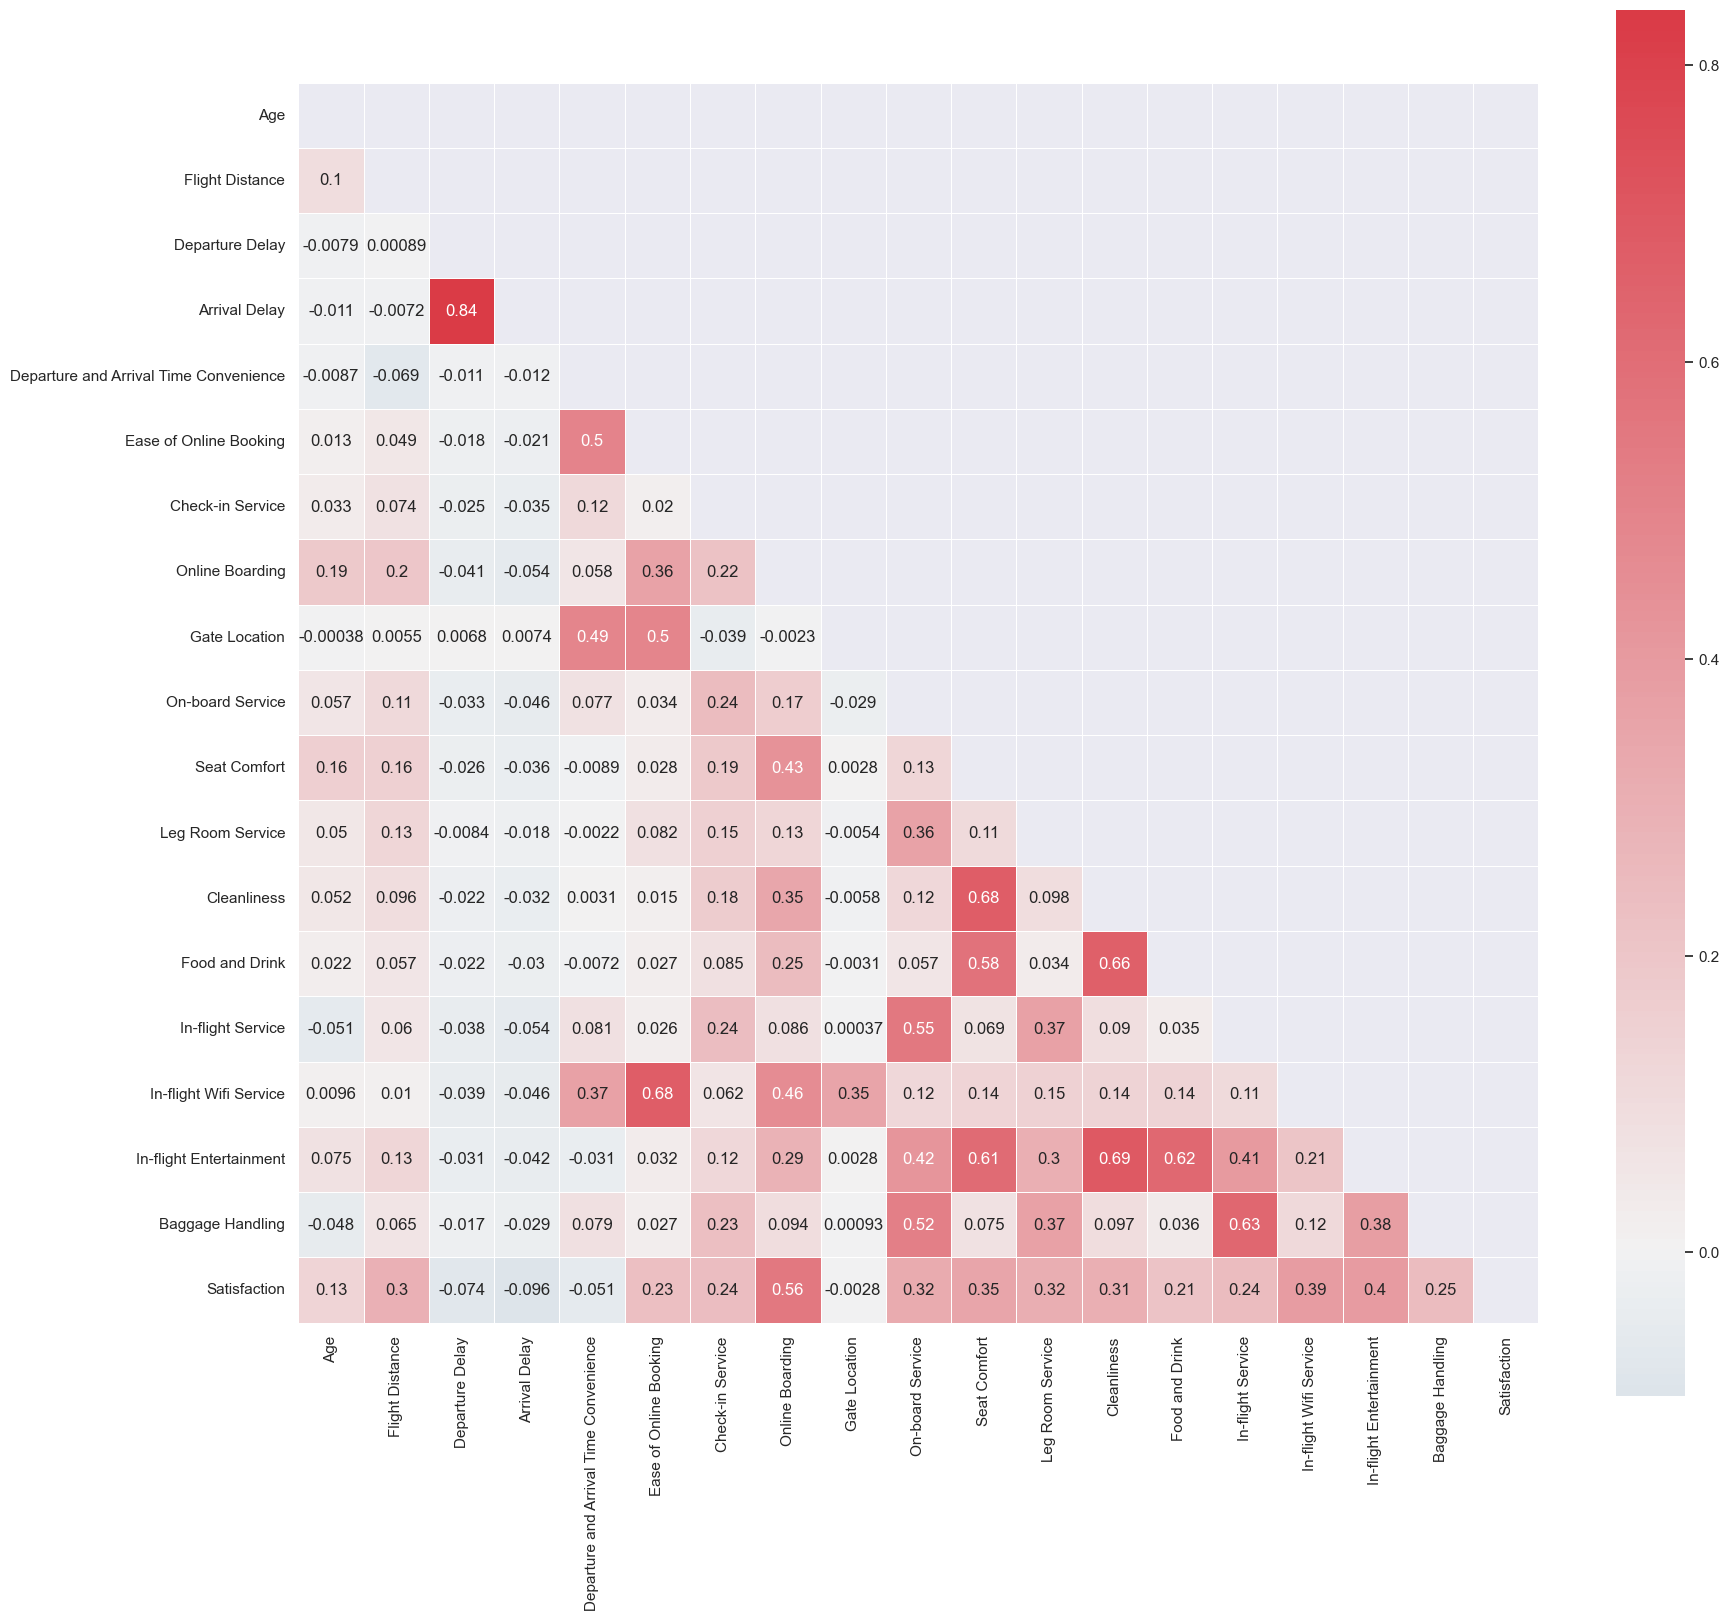

In [37]:
corr = AirlineData.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sb.diverging_palette(240, 10, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot_kws={"fontsize":12}, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

#### Observation: Departure Delay and Arrival Delay which are highly correlated with each other. Online Boarding has quite high correlation with Satisfaction.